In [1]:
from google.colab import files
import numpy as np # работа с числами
import pandas as pd # удобная  работа с датасетами
import scipy as sp #выполнения научных и инженерных расчётов
from scipy.optimize import fsolve
import matplotlib.pyplot as plt # Графики

BuildingMachineLearningSystemsWithPython/ch01/data/web_traffic.tsv

In [2]:
#files.upload()

In [3]:
!dir ~

In [4]:
!ls -al

total 24
drwxr-xr-x 1 root root 4096 Mar 19 19:31 .
drwxr-xr-x 1 root root 4096 Mar 19 19:27 ..
drwxr-xr-x 4 root root 4096 Mar 18 13:36 .config
drwxr-xr-x 1 root root 4096 Mar 18 13:36 sample_data
-rw-r--r-- 1 root root 6538 Mar 19 19:31 web_traffic.csv


## Загрузим данные

In [5]:
df = pd.read_csv("web_traffic.csv",sep = "\t", header=None)
df.columns = ['t','c']

In [6]:
#df = df.set_index(['t'])

## Обзор данных

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t       743 non-null    int64  
 1   c       735 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 11.7 KB


In [8]:
df.head(10)

,t,c
0,1,2272.0
1,2,NaN
2,3,1386.0
3,4,1365.0
4,5,1488.0
5,6,1337.0
6,7,1883.0
7,8,2283.0
8,9,1335.0
9,10,1025.0


In [9]:
df.shape

(743, 2)

Датасет состоит из 743 строк и можно увидеть, что присутсвуют пустые(NAN) значения

In [10]:
print (f"В датасете {df['c'].isna().sum()} пустых значений")

В датасете 8 пустых значений


Заменим эти пустые значения на предыдущие





In [11]:
for i in range(df.shape[0]):
  if np.isnan(df['c'].iloc[i]):
    df['c'].iloc[i] = df['c'].iloc[i-1]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Приведём столбец с кол-вом к целочисленным значениям

In [12]:
df['c'] = df['c'].astype('int32')

## Составим график этих данных и поппытаемся подобрать нужную функцию для них

Составим некоторое представление о данных, с помощью диаграммы рассеяния

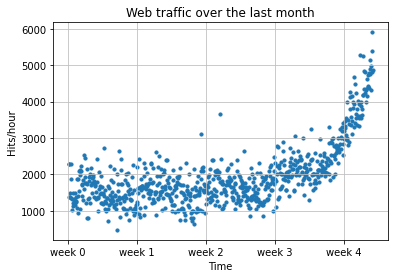

In [13]:
plt.scatter(df['t'],df['c'],s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range (10)],['week %i' % w for w in range(10)])
plt.autoscale(tight=False)
plt.grid(True,linestyle='-',color='0.75')
plt.show()

Реализуем функцию вычисления погрешности

In [14]:
def error(f,x,y):
  return np.round(np.sum((f(x)-y)**2),3)

Составим линию со степенью полинома 1, тобеж прямая линия. Также составим несколько линий с большим кол-вом степенией полиномов. Выведем параметры модели №1 как пример.

In [15]:
## np.polyfit находит такую прямую, погрешность апроксимизации минимальна
##  full = True нужен для того, чтобы получить более подробные детали апроксимизации модели
##  fp = парамеры модели
##  residuals - остатки модели
##  rank  = ранг матрицы
##  sv = Особые значения
## np.poly1d построение модельной функции по параметрам модели

fp1 , residuals1 , rank1 , sv1 , rcond1 = np.polyfit(df['t'],df['c'],1,full=True)
print("Параметры модели №1: %s" % fp1)
print(residuals1)
f1 = np.poly1d(fp1)

fp2 , residuals2 , rank2 , sv2 , rcond2 = np.polyfit(df['t'],df['c'],2,full=True)
f2 = np.poly1d(fp2)

fp3 , residuals3 , rank3 , sv3 , rcond3 = np.polyfit(df['t'],df['c'],3,full=True)
f3 = np.poly1d(fp3)

fp10 , residuals10 , rank10 , sv10 , rcond10 = np.polyfit(df['t'],df['c'],10,full=True)
f10 = np.poly1d(fp10)

fp50 , residuals50 , rank50 , sv50 , rcond50 = np.polyfit(df['t'],df['c'],50,full=True)
f50 = np.poly1d(fp50)

Параметры модели №1: [  2.57556555 999.31087998]
[3.19976936e+08]


In [16]:
#print(f"d=1, error: {error(f1,df['t'],df['c'])}")
print(f"d=2, error: {error(f2,df['t'],df['c'])}")
print(f"d=3, error: {error(f3,df['t'],df['c'])}")
print(f"d=10, error: {error(f10,df['t'],df['c'])}")
print(f"d=50, error {error(f50,df['t'],df['c'])}")

d=2, error: 181212308.792
d=3, error: 141234567.575
d=10, error: 123636173.3
d=50, error 111071287.03


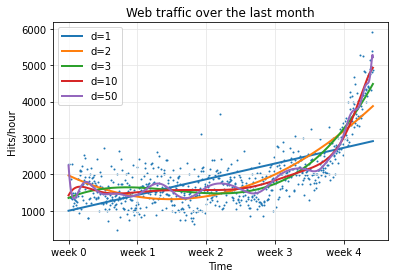

In [17]:
fx = np.linspace(0,df['t'].iloc[-1],1000) #сгенерировать значения Х для рафика

plt.scatter(df['t'],df['c'],s=1)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour") 
plt.xticks([w*7*24 for w in range (10)],['week %i' % w for w in range(10)])
plt.autoscale(tight=False)
plt.grid(True,linestyle='-',color='0.9')
plt.plot(fx, f1(fx), linewidth=2)
plt.plot(fx, f2(fx), linewidth=2)
plt.plot(fx, f3(fx), linewidth=2)
plt.plot(fx, f10(fx), linewidth=2)
plt.plot(fx, f50(fx), linewidth=2)
plt.legend(["d=%i"% f1.order, 
            "d=%i"% f2.order,
            "d=%i"% f3.order,
            "d=%i"% f10.order,
            "d=%i"% f50.order,] , loc= "upper left")

plt.show()

## Разделим линию полинома степени 1 на 2 части до изгиба на промежутке 3 и 4 недели.

In [18]:
inflection = int(3.5*7*24)
x = np.array(df['t'].values)
y = np.array(df['c'].values)

xa = x[:inflection]
ya = y[:inflection]
xb = x[inflection:]
yb = y[inflection:]

fa = np.poly1d(np.polyfit(xa,ya,1))
fb = np.poly1d(np.polyfit(xb,yb,1))

fa_error = error(fa,xa,ya)
fb_error = error(fb, xb, yb)
print("Error inflection=%f" % (fa_error + fb_error))

Error inflection=136578745.870000


Можно увидеть, что комбинация двух прямых даёт меньшую ошибку, чем это была бы 1 прямая, но стоит отметить.что погрешность больше, чем у полиномов более высокой степени

Нарисуем график этих прямых

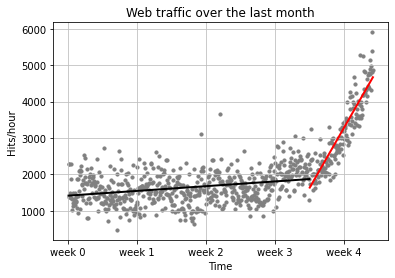

In [19]:
plt.scatter(df['t'],df['c'],s=10, color='gray')
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range (10)],['week %i' % w for w in range(10)])
plt.autoscale(tight=False)
plt.grid(True,linestyle='-',color='0.75')
plt.plot(xa, fa(xa), linewidth=2,color='black')
plt.plot(xb, fb(xb), linewidth=2,color='red')
plt.show()

Очевидно, что вторая линия, описывающая более свежие сроки, будет более актуальна, чем старые.
Исходя из графиков пусть 2й полином будет самым лучшим, так как в среднем он описывает данные объективнее.

In [20]:
fbt2 = np.poly1d(np.polyfit(xb,yb,2))
print("fbt2(x)= \n%s" % fbt2)

fbt2(x)= 
        2
0.1002 x - 113.8 x + 3.428e+04


In [21]:
print("fbt2(x)-100000= \n%s" % (fbt2-100000))

fbt2(x)-100000= 
        2
0.1002 x - 113.8 x - 6.572e+04


In [22]:
## fsolve = находит корни функции благодаря начальному значению

reached_max = fsolve(fbt2 - 100000, x0=800)/(7*24)
print("100,000 hits/hour expected as week %f" % reached_max[0])

100,000 hits/hour expected as week 9.266327


Таким образом , мы ожидаем выхода на ровень 100_000 за просов/час в неделю 9.266, то есть наша модель предсказывает , что если нынешнее поведение пользователей сохранится и компания не утратит привлекательности, то до насыщния текущей пропускной  пособности остаётся ещё месяц.
